<a href="https://colab.research.google.com/github/suzunotree/Python-for-Data-Science-and-AI-presentation-I-group-4/blob/main/Python_for_Data_Science_and_AI_groupproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First we imported the libraries we needed for analysis.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#This is the API which we worked on. We got it from MBTA.
test_url = 'https://api-v3.mbta.com/route_patterns?filter[route]=CR-Providence&include=representative_trip&fields[trip]=headsign'
response = requests.get(test_url)
data = response.json()

# Extract relevant information into a DataFrame
route_patterns = [
    {
        'route_pattern_id': pattern['id'],
        'direction_id': pattern['attributes']['direction_id'],
        'name': pattern['attributes']['name'],
        'typicality': pattern['attributes']['typicality'],
    }
    for pattern in data['data']
]

df = pd.DataFrame(route_patterns)

# Display the DataFrame to verify the structure
df.head()

,route_pattern_id,direction_id,name,typicality
0,CR-Providence-9cf54fb3-0,0,South Station - Wickford Junction via Back Bay,1
1,CR-Providence-9515a09b-0,0,South Station - Stoughton via Back Bay,1
2,CR-Providence-743ff41d-0,0,South Station - Providence via Back Bay,2
3,CR-Providence-cf299c9f-0,0,South Station - Stoughton via Back Bay,3
4,CR-Providence-e7e93ca2-0,0,South Station - Wickford Junction via Back Bay,3


#Research Question 1: Does the CR-Providence route have more inbound or outbound routes?
#Hypothesis 1: There are more inbound routes.


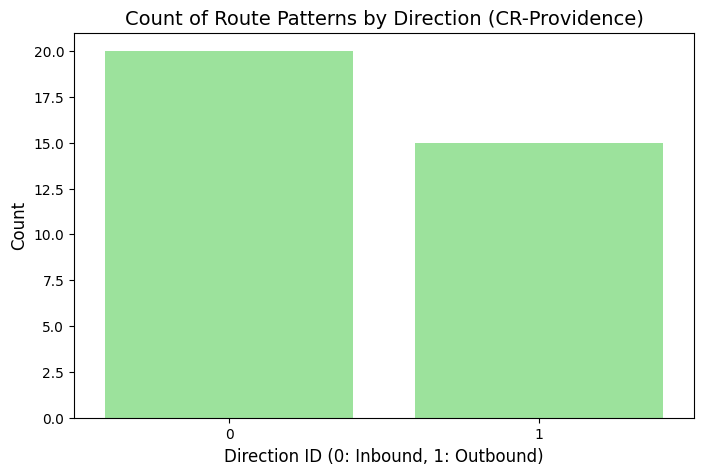

In [ ]:
# Visualize the count of route patterns by direction
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='direction_id', color='lightgreen')
plt.title('Count of Route Patterns by Direction (CR-Providence)', fontsize=14)
plt.xlabel('Direction ID (0: Inbound, 1: Outbound)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

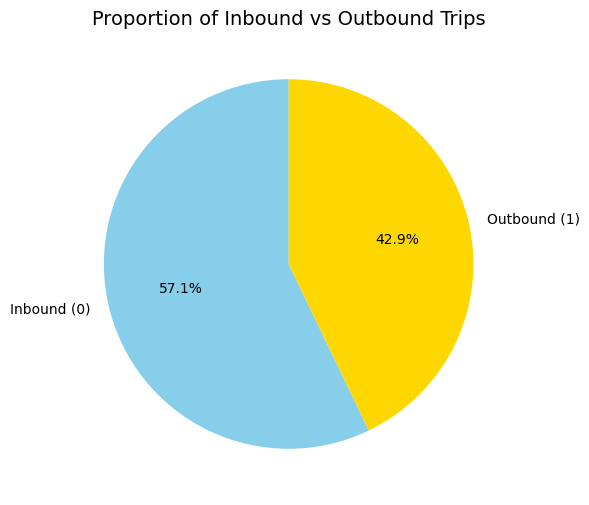

In [ ]:
# Pie chart for proportion of direction usage
direction_counts = df['direction_id'].value_counts()
labels = ['Inbound (0)', 'Outbound (1)']
plt.figure(figsize=(6, 6))
plt.pie(direction_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FFD700'])
plt.title('Proportion of Inbound vs Outbound Trips', fontsize=14)
plt.show()

Result:
The graph for count of route patterns by direction shows that the inbound is higher than outbound.
Also, the piechart confirms that 57% of the routes are inbound, while 43% are outbound, supporting our hypothesis.

#Research question 2: Are certain route patterns more frequent in the data?

#Hypothesis 2: Specific patterns such as "South Station - Wickford Junction" appear more frequently.

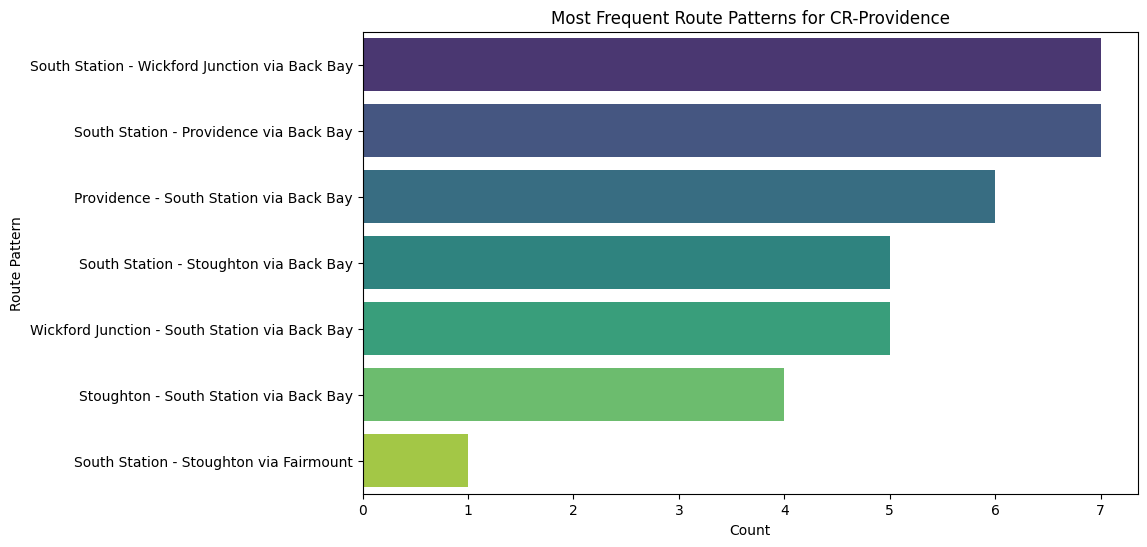

In [ ]:
# Preparing data for the bar chart
frequent_patterns = df['name'].value_counts().reset_index()
frequent_patterns.columns = ['Route Pattern', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=frequent_patterns, x='Count', y='Route Pattern', hue='Route Pattern', dodge=False, palette="viridis", legend=False)
plt.title('Most Frequent Route Patterns for CR-Providence')
plt.xlabel('Count')
plt.ylabel('Route Pattern')
plt.show()

**Result:**

The bar plot of route patterns shows that "South Station - Wickford Junction via Back Bay" and similar patterns dominate the dataset. This confirms that certain route patterns are indeed more frequent than others.

#Research Question3: Is there a correlation between direction (inbound or outbound) and the typicality of routes in the CR-Providence route patterns?

#Hypothesis3: Routes with higher typicality scores are more likely to be inbound (direction_id = 0).

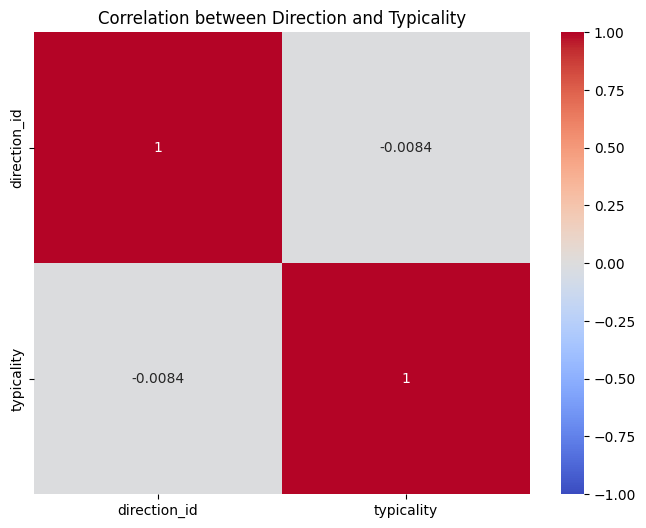

,direction_id,typicality
direction_id,1.000000,-0.008382
typicality,-0.008382,1.000000


In [ ]:
# New Research Question and Hypothesis
# Research Question: Is there a correlation between direction and typicality in the CR-Providence route patterns?
# Hypothesis: Routes with higher typicality scores are more likely to be inbound (direction_id = 0).

# Exploring correlation using basic statistics
correlation = df[['direction_id', 'typicality']].corr()

# Visualizing the correlation between direction and typicality
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation between Direction and Typicality')
plt.show()

correlation

**Research Question:**
Is there a correlation between direction (inbound or outbound) and the typicality of routes in the CR-Providence route patterns?

**Hypothesis:**
Routes with higher typicality scores are more likely to be inbound (direction_id = 0).

**Result:**
The correlation coefficient between direction_id and typicality is -0.008, which indicates almost no linear correlation between these two variables.

Interpretation: The direction (whether the route is inbound or outbound) does not appear to be related to the typicality score. Thus, the hypothesis is not supported by the data.

For example:

A typicality of 1 might indicate a highly standard route that runs regularly, such as trips between South Station and Providence without variations.
Higher typicality values (like 3 or 5) may represent less typical patterns, such as seasonal routes, special event services, or express trips that skip certain stops​
HEXDOCS
​
TRANSITFEEDS
.
For the CR-Providence line, an example of this concept could be distinguishing between:

A regular weekday route stopping at every station.
A limited or express service, which skips less busy stops to reduce travel time.